In [1]:
import matplotlib.pyplot as plt
import numpy as np

from whirly.fourier import FourierField
from whirly.solvers import NavierStokesSolver
from whirly.visuals import make_animation, plot
from whirly.utils import make_grid

%matplotlib inline

In this notebook, we use the `NavierStokesSolver` to evolve a system of three vortices. First, let's define some parameters.

In [2]:
m, p = 101, 1
tau, T = 0.01, 50
Re = 1e8

Below we define the initial conditions.

In [3]:
def make_vortex(x_c, y_c):
    def func(x, y):
        return np.exp(-100 * ((x - x_c) ** 2 + (y - y_c) ** 2))
    
    return func

x, y = make_grid(m, p)
zeta_initial = FourierField.from_real(
    make_vortex(0.4, 0.5)(x, y) -
    make_vortex(0.6, 0.5)(x, y) +
    make_vortex(0.75, 0.7)(x, y)
)

We can now define a solver object and use it to integrate the Navier-Stokes vorticity equation.

In [4]:
solver = NavierStokesSolver(tau, m, p, Re)
outputs = solver.solve(zeta_initial, T, output_tau=0.1)

Let's show the first and last frames of the simulation.

Text(0.5, 1.0, '$\\zeta$ at $t = 50$')

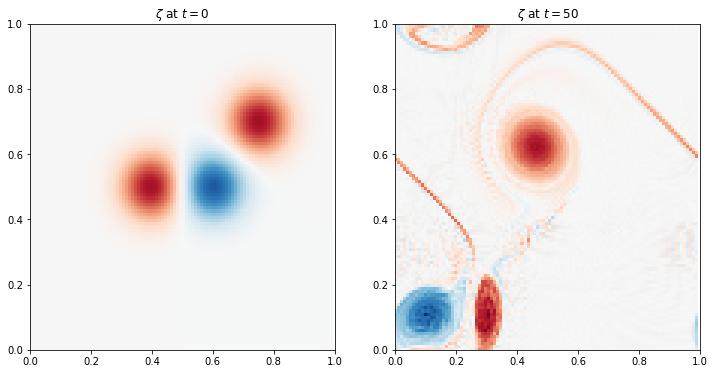

In [5]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12, 6)

fields = [zeta_initial, outputs[-1]]
vmax = max(abs(zeta.real).max() for zeta in fields)

plot(zeta_initial, axes[0], vmax)
plot(outputs[-1], axes[1], vmax)

axes[0].set_title('$\zeta$ at $t = 0$')
axes[1].set_title(f'$\zeta$ at $t = {T}$')

We can also make an animation of the vortices' evolution.

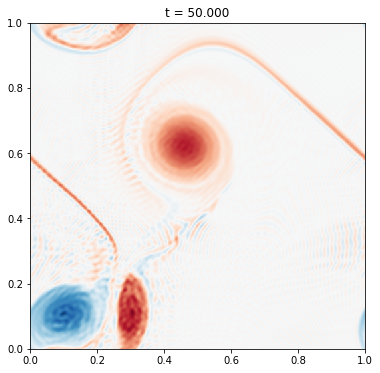

In [6]:
ani = make_animation(outputs, output_tau=0.1, m=501)
ani.save('three-vortices.mp4', dpi=300)